This iPython Notebook serves as the python code for all the data wrangling, exploratory data analysis as well as data visualization performed for the project "Vehicular Crash Analysis - Prediciting Accident Severity and Crash frequency in Washington D.C."by Adarsh, Isha and Kuhu. The visualizations as well as the insights generated from our conducted data analysis can be seen here.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import datetime as dt

In [6]:
%matplotlib inline

In [7]:
df=pd.read_csv('/Users/Adiii/Documents/Fall 2016/INFM 750/Project/Filtered_dataset.csv', encoding= "ISO-8859-1")

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,¥éËX,Y,OBJECTID,COMPLAINTNUMBER,ACCIDENTDATE,YEAR,DATEENTERED,MILITARYTIME_NEW,MILITARYTIME_CONVERT,MILITARYTIME,...,REVISED_QUADRANT,RECORDREMA,LASTUPDATE,ENTEREDBY,LATITUDE,LONGITUDE,IMPAIRMENT,STREETSEGID,TAXIINVOLVED,TOURBUSINVOLVED
0,-77.072363,38.921187,3607,11124907,26-Aug-11,2011,3-Sep-11,16:45,1645,1645,...,1,"NEW,LVL:1",3-Sep-11,MPD,38.921179,-77.072361,NaN,7692,NaN,NaN
1,-77.072363,38.921187,3609,14158068,14-Oct-14,2014,24-Dec-14,09:01,901,901,...,1,"NEW,LVL:2",24-Dec-14,MPD,38.921179,-77.072361,NaN,7692,NaN,NaN
2,-77.073146,38.929170,3610,10024826,26-Feb-10,2010,7-Jul-10,21:46,2146,2146,...,1,"NEW,LVL:2",7-Jul-10,MPD,38.929162,-77.073143,NaN,6434,NaN,NaN
3,-77.072912,38.922548,3611,10175486,4-Dec-10,2010,6-Dec-10,22:01,2201,2201,...,1,"NEW,LVL:1",6-Dec-10,MPD,38.922540,-77.072910,NaN,7692,NaN,NaN
4,-77.072912,38.922548,3612,11008198,19-Jan-11,2011,12-Mar-12,11:35,1135,1135,...,1,"NEW,LVL:2",12-Mar-12,MPD,38.922540,-77.072910,NaN,7692,NaN,NaN


In [9]:
del df['¥éËX']

In [10]:
del df['Y']
del df['RECORDREMA']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68948 entries, 0 to 68947
Data columns (total 73 columns):
OBJECTID                68948 non-null int64
COMPLAINTNUMBER         68948 non-null int64
ACCIDENTDATE            68948 non-null object
YEAR                    68948 non-null int64
DATEENTERED             68948 non-null object
MILITARYTIME_NEW        68948 non-null object
MILITARYTIME_CONVERT    68948 non-null int64
MILITARYTIME            68948 non-null int64
DAYOFWEEK               68948 non-null object
REPORTDATE              68948 non-null object
ACCIDENTTYPE            68948 non-null object
ACCIDENTTYPE_1          68948 non-null object
ACCIDENTOCCURED         68948 non-null object
ADDRESSBLOCK            68948 non-null int64
DISTRICT                68948 non-null object
RAPSA                   68948 non-null int64
NUMINVOLVED             68948 non-null int64
NUMINJURED              68948 non-null int64
NUMFATALITIES           68948 non-null int64
FEETFROMINTERSECTION    689

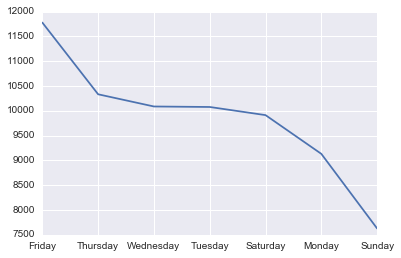

In [12]:
df['DAYOFWEEK'].value_counts().plot()

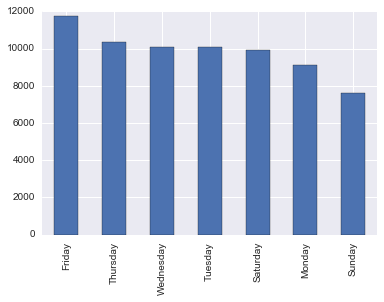

In [13]:
df['DAYOFWEEK'].value_counts().sort_values(ascending=False).plot('bar')

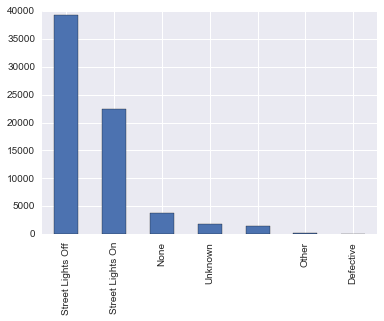

In [14]:
df['STREETLIGHT'].value_counts().plot('bar')

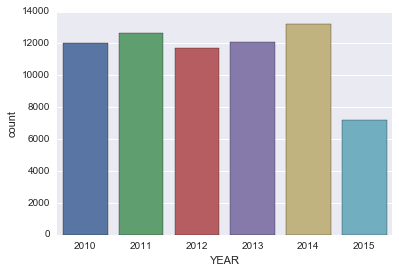

In [42]:
ax=sns.countplot(x="YEAR", data=df)

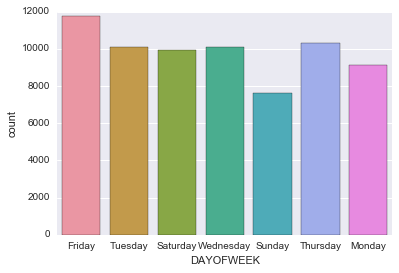

In [15]:
ax = sns.countplot(x="DAYOFWEEK", data=df)

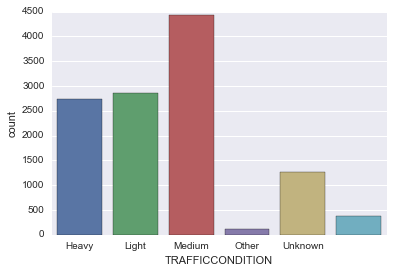

In [16]:
ax= sns.countplot(x='TRAFFICCONDITION', data=df[df.DAYOFWEEK=='Friday'])

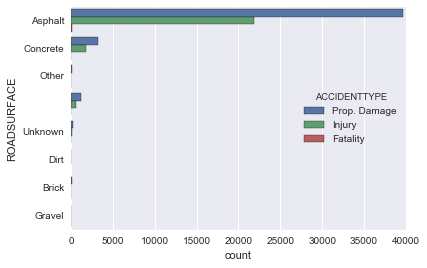

In [17]:
ax=sns.countplot(y="ROADSURFACE", hue="ACCIDENTTYPE", data=df)

In [18]:
df['MILITARYTIME_NEW']=pd.to_datetime(df['MILITARYTIME_NEW'])

In [19]:
df['MILITARYTIME_NEW_HOUR'] = df['MILITARYTIME_NEW'].apply(lambda x: x.hour)

In [20]:
df.head()

,OBJECTID,COMPLAINTNUMBER,ACCIDENTDATE,YEAR,DATEENTERED,MILITARYTIME_NEW,MILITARYTIME_CONVERT,MILITARYTIME,DAYOFWEEK,REPORTDATE,...,REVISED_QUADRANT,LASTUPDATE,ENTEREDBY,LATITUDE,LONGITUDE,IMPAIRMENT,STREETSEGID,TAXIINVOLVED,TOURBUSINVOLVED,MILITARYTIME_NEW_HOUR
0,3607,11124907,26-Aug-11,2011,3-Sep-11,2016-10-16 16:45:00,1645,1645,Friday,26-Aug-11,...,1,3-Sep-11,MPD,38.921179,-77.072361,NaN,7692,NaN,NaN,16
1,3609,14158068,14-Oct-14,2014,24-Dec-14,2016-10-16 09:01:00,901,901,Tuesday,14-Oct-14,...,1,24-Dec-14,MPD,38.921179,-77.072361,NaN,7692,NaN,NaN,9
2,3610,10024826,26-Feb-10,2010,7-Jul-10,2016-10-16 21:46:00,2146,2146,Friday,26-Feb-10,...,1,7-Jul-10,MPD,38.929162,-77.073143,NaN,6434,NaN,NaN,21
3,3611,10175486,4-Dec-10,2010,6-Dec-10,2016-10-16 22:01:00,2201,2201,Saturday,5-Dec-10,...,1,6-Dec-10,MPD,38.922540,-77.072910,NaN,7692,NaN,NaN,22
4,3612,11008198,19-Jan-11,2011,12-Mar-12,2016-10-16 11:35:00,1135,1135,Wednesday,19-Jan-11,...,1,12-Mar-12,MPD,38.922540,-77.072910,NaN,7692,NaN,NaN,11


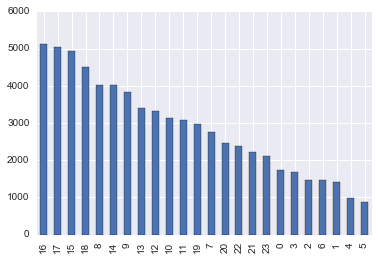

In [23]:
df['MILITARYTIME_NEW_HOUR'].value_counts().plot('Bar')

In [ ]:
df.head()

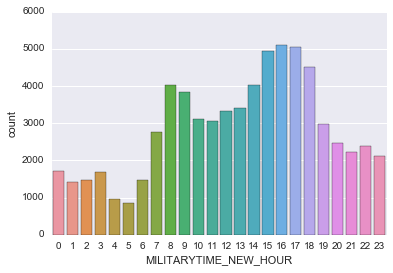

In [29]:
ax=sns.countplot(x='MILITARYTIME_NEW_HOUR',data=df)

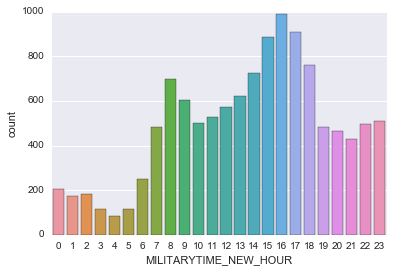

In [28]:
ax=sns.countplot(x='MILITARYTIME_NEW_HOUR',data=df[df['DAYOFWEEK']=='Friday'])

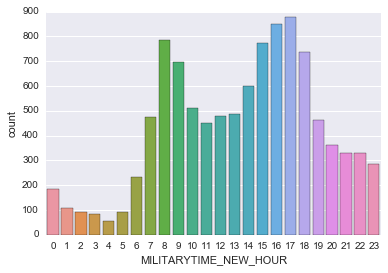

In [30]:
ax=sns.countplot(x='MILITARYTIME_NEW_HOUR',data=df[df['DAYOFWEEK']=='Thursday'])

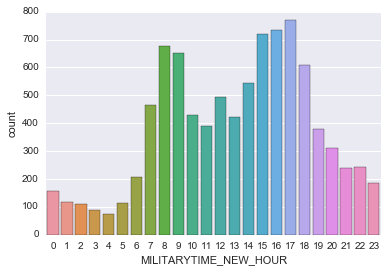

In [31]:
ax=sns.countplot(x='MILITARYTIME_NEW_HOUR',data=df[df['DAYOFWEEK']=='Monday'])

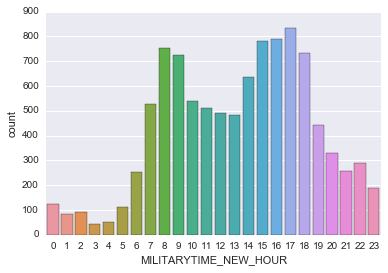

In [32]:
ax=sns.countplot(x='MILITARYTIME_NEW_HOUR',data=df[df['DAYOFWEEK']=='Tuesday'])

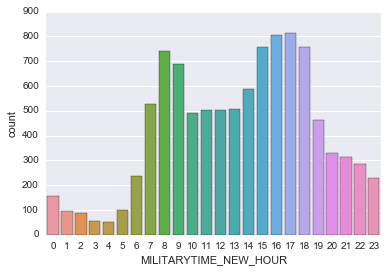

In [33]:
ax=sns.countplot(x='MILITARYTIME_NEW_HOUR',data=df[df['DAYOFWEEK']=='Wednesday'])

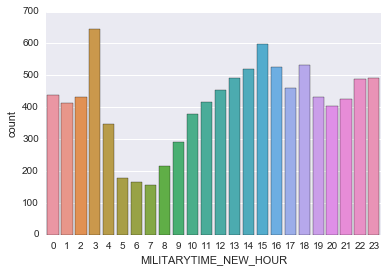

In [34]:
ax=sns.countplot(x='MILITARYTIME_NEW_HOUR',data=df[df['DAYOFWEEK']=='Saturday'])

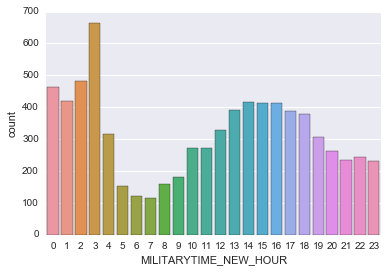

In [35]:
ax=sns.countplot(x='MILITARYTIME_NEW_HOUR',data=df[df['DAYOFWEEK']=='Sunday'])

In [44]:
df['STREETSEGID'].value_counts()

0        2609
14693     533
12636     392
369       378
6364      354
5504      213
14688     194
9529      193
14746     170
14707     165
14747     156
11171     155
8195      155
9802      154
8124      147
5011      140
5435      132
11236     132
8491      124
645       123
12167     122
10985     121
2681      117
9387      114
164       114
1416      111
15360     110
5024      109
7156      108
5265      108
         ... 
37          1
9589        1
7602        1
663         1
12938       1
11700       1
8840        1
5619        1
1649        1
10825       1
2829        1
13559       1
12707       1
4391        1
4915        1
11060       1
9077        1
13386       1
11252       1
3120        1
7218        1
5070        1
13258       1
12643       1
3184        1
1137        1
3248        1
10592       1
3312        1
3343        1
Name: STREETSEGID, dtype: int64